In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
sns.set(style="white", context='poster')
from sympy import *
import math
init_printing(use_unicode=True)
from scipy.integrate import solve_ivp

In [2]:
from numba import njit

In [3]:
import numba

levenberg optimization

In [4]:
%load_ext autoreload
%autoreload 2


In [6]:
#from model_equations_separate_NC import *
from model_equations_separate_NC_store_numba import *


In [7]:

HCOLOR = '#ffc58f'
HCOLOR_light = '#ffd2a9'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

SHCOLOR = '#ffa98f'
SPCOLOR = '#326232'


ccnpalette = [PCOLOR, PCOLOR_light, HCOLOR, HCOLOR_light, SPCOLOR, SHCOLOR,DONCOLOR, RDONCOLOR, DINCOLOR]
ccnorder = ['Bp', 'Np', 'Bh','Nh',  'ABp', 'ABh', 'DON', 'RDON', 'DIN', ]
cccpalette = [PCOLOR, PCOLOR_light, HCOLOR, HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
cccorder = ['Bp[C]', 'Cp', 'Bh[C]', 'Ch', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hnpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
hnorder = [ 'Bh', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
hcpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
hcorder = [ 'Bh[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
pnpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
pnorder = [ 'Bp', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
pcpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
pcorder = [ 'Bp[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
sns.color_palette(ccnpalette + cccpalette, )
# 


In [8]:

 
sns.color_palette([PCOLOR, HCOLOR, PCOLOR_light, HCOLOR_light] )


In [9]:
refdf = pd.read_excel('reference_10cc_axenic.xlsx')


In [10]:
refdf.columns

Index(['day', 'Sample', 'id', 'replicate', 'transfer', 'transfer day',
       'heterotroph', 'full name', 'FL', 'Group', 'predicted', 'ref_Bp', 'LOD',
       't'],
      dtype='object')

In [132]:
param_vals = get_param_vals('MIN')
#param_vals = get_param_vals('OVERFLOW')
#param_vals = get_param_vals('MIXOTROPH')
#param_vals = get_param_vals('EXOENZYME')


In [133]:
param_vals

{'Mh': 1.157407407407407e-06,
 'Mp': 1.157407407407407e-06,
 'gammaDp': 0.6,
 'gammaDh': 0.6,
 'Rp': 7.0,
 'Rh': 4.5,
 'E_leakp': 1.157407407407407e-06,
 'E_leakh': 1.157407407407407e-06,
 'KONp': 0.1427507995452611,
 'KINp': 0.1427507995452611,
 'KOCp': 0.1427507995452611,
 'KICp': 0.1427507995452611,
 'KONh': 0.2502723352076287,
 'KINh': 0.2502723352076287,
 'KOCh': 0.2502723352076287,
 'KICh': 0.2502723352076287,
 'VmaxONp': 0.0,
 'VmaxINp': 8.2e-05,
 'VmaxOCp': 0.0,
 'VmaxICp': 6.4e-05,
 'VmaxONh': 1.50462962962963e-05,
 'VmaxINh': 1.50462962962963e-05,
 'VmaxOCh': 6.770833333333334e-05,
 'VmaxICh': 0.0,
 'OverflowMode': 0.0,
 'E_ROSp': 0.0,
 'E_ROSh': 0.0,
 'VmaxROSh': 0.0,
 'K_ROSh': 0.2502723352076287,
 'ROS_decay': 1.1574074074074074e-07,
 'MROSp': 0.0,
 'MROSh': 0.0,
 'MKROSp': 0.1427507995452611,
 'MKROSh': 0.1427507995452611,
 'KABp': 0.1427507995452611,
 'KABh': 0.1427507995452611,
 'EABp': 0.0,
 'EABh': 0.0,
 'decayABh': 0.0,
 'decayABp': 0.0,
 'MABp': 0.0,
 'MABh': 0.0,
 

In [134]:
print_params()

Mh  = 1.16e-06, 1.00e-01
Mp  = 1.16e-06, 1.00e-01
gammaDp  = 6.00e-01, 5.18e+04
gammaDh  = 6.00e-01, 5.18e+04
Rp  = 7.00e+00, 6.05e+05
Rh  = 4.50e+00, 3.89e+05
E_leakp  = 1.16e-06, 1.00e-01
E_leakh  = 1.16e-06, 1.00e-01
KONp  = 1.43e-01, 1.23e+04
KINp  = 1.43e-01, 1.23e+04
KOCp  = 1.43e-01, 1.23e+04
KICp  = 1.43e-01, 1.23e+04
KONh  = 2.50e-01, 2.16e+04
KINh  = 2.50e-01, 2.16e+04
KOCh  = 2.50e-01, 2.16e+04
KICh  = 2.50e-01, 2.16e+04
VmaxONp  = 1.64e-05, 1.42e+00
VmaxINp  = 8.20e-05, 7.08e+00
VmaxOCp  = 1.28e-05, 1.11e+00
VmaxICp  = 6.40e-05, 5.53e+00
VmaxONh  = 1.50e-05, 1.30e+00
VmaxINh  = 1.50e-05, 1.30e+00
VmaxOCh  = 6.77e-05, 5.85e+00
VmaxICh  = 0.00e+00, 0.00e+00
paramOverflow  = 1.00e+00, 8.64e+04
E_ROSp  = 6.48e-07, 5.60e-02
E_ROSh  = 4.05e-07, 3.50e-02
VmaxROSh  = 7.70e-06, 6.65e-01
K_ROSh  = 2.50e-01, 2.16e+04
ROS_decay  = 1.16e-07, 1.00e-02
MROSp  = 1.16e-07, 1.00e-02
MROSh  = 1.16e-07, 1.00e-02
MKROSp  = 1.43e-01, 1.23e+04
MKROSh  = 1.43e-01, 1.23e+04
KABp  = 1.43e-01, 1.23e+

In [135]:
var_names, var_vals =  get_main_init_vars(pro99_mode=False)


In [136]:
par_tuple = prepare_params(param_vals)
par_tuple

(array([7. , 4.5]),
 array([10., 10.]),
 array([4., 4.]),
 array([[0.1427508 , 0.25027234],
        [0.1427508 , 0.25027234],
        [0.1427508 , 0.25027234],
        [0.1427508 , 0.25027234]]),
 array([[8.20000000e-05, 1.50462963e-05],
        [0.00000000e+00, 1.50462963e-05],
        [6.40000000e-05, 0.00000000e+00],
        [0.00000000e+00, 6.77083333e-05]]),
 array([3.5e-05, 3.5e-05]),
 0.0,
 array([0.01, 0.01]),
 array([2.08333333e-06, 2.08333333e-06]),
 array([1.15740741e-06, 1.15740741e-06]),
 array([1.15740741e-06, 1.15740741e-06]),
 array([0., 0.]),
 0.0,
 0.2502723352076287,
 array([0., 0.]),
 array([0.6, 0.6]),
 1.1574074074074074e-07)

In [137]:
np.zeros(2, dtype=np.float64)

array([0., 0.])

In [138]:
len(var_vals)

In [160]:
dBpdt, dNpdt, dCpdt, dBhdt, dNhdt, dChdt, dDONdt, dRDONdt, dDINdt, dDOCdt, dRDOCdt, dDICdt, dROSdt = basic_model_cc_ode(0, var_vals, par_tuple)

In [161]:
%timeit -r 4 -n 10000 basic_model_cc_ode(0, var_vals, par_tuple)


8.07 µs ± 142 ns per loop (mean ± std. dev. of 4 runs, 10000 loops each)


In [162]:
%timeit -r 4 -n 10000 prepare_params(param_vals)


8.24 µs ± 228 ns per loop (mean ± std. dev. of 4 runs, 10000 loops each)


In [163]:
print_dydt0(basic_model_cc_ode, var_names, var_vals, par_tuple)

dBp/dt = -4.13e-06, init Bp = 1.79e+00, newval = 1.79e+00
dNp/dt = 6.27e-05, init Np = 0.00e+00, newval = 6.27e-05
dCp/dt = 8.24e-06, init Cp = 0.00e+00, newval = 8.24e-06
dBh/dt = -6.61e-05, init Bh = 2.86e+01, newval = 2.86e+01
dNh/dt = 9.48e-05, init Nh = 0.00e+00, newval = 9.48e-05
dCh/dt = 7.94e-04, init Ch = 0.00e+00, newval = 7.94e-04
dDON/dt = 9.04e-06, init DON = 2.00e+01, newval = 2.00e+01
dRDON/dt = 1.41e-05, init RDON = 0.00e+00, newval = 1.41e-05
dDIN/dt = -1.10e-04, init DIN = 1.00e+02, newval = 1.00e+02
dDOC/dt = -8.01e-04, init DOC = 1.32e+02, newval = 1.32e+02
dRDOC/dt = 6.53e-05, init RDOC = 0.00e+00, newval = 6.53e-05
dDIC/dt = 2.60e-04, init DIC = 2.24e+03, newval = 2.24e+03
dROS/dt = -2.31e-08, init ROS = 2.00e-01, newval = 2.00e-01


In [164]:
biomass_diff0(basic_model_cc_ode, var_names, var_vals, par_tuple)

dBp/dt + dBh/dt + dDON/dt + dRDON/dt + dDIN/dt = 0.0
dBp/dt + dBh/dt + dDOC/dt + dRDOC/dt + dDIC/dt = 0.0


In [165]:
def run_solver_ivp(calc_dydt, init_vars, days, t_eval, par_tuple, method='BDF'):
    tstart = 0
    if t_eval is None: 
        tend = days*seconds_in_day
        t_eval = np.arange(tstart, tend, 3600*4)
    else:
        tend= np.max(t_eval)
    sol = solve_ivp(
        fun=calc_dydt, y0=init_vars, args=(par_tuple,),
        t_span=[tstart, tend], t_eval=t_eval, max_step=1000, #first_step=1, 
        method=method)
        #method='Radau',)
    return sol

In [166]:
sol = run_solver_ivp(basic_model_cc_ode, var_vals, days=140, t_eval=None, par_tuple=par_tuple)


In [167]:
%timeit -r 4 -n 2  run_solver_ivp(basic_model_cc_ode, var_vals, days=140, t_eval=None, par_tuple=par_tuple)


1.2 s ± 15.2 ms per loop (mean ± std. dev. of 4 runs, 2 loops each)


In [168]:
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 24389
     njev: 16
      nlu: 3440
      sol: None
   status: 0
  success: True
        t: array([       0,    14400,    28800,    43200,    57600,    72000,
          86400,   100800,   115200,   129600,   144000,   158400,
         172800,   187200,   201600,   216000,   230400,   244800,
         259200,   273600,   288000,   302400,   316800,   331200,
         345600,   360000,   374400,   388800,   403200,   417600,
         432000,   446400,   460800,   475200,   489600,   504000,
         518400,   532800,   547200,   561600,   576000,   590400,
         604800,   619200,   633600,   648000,   662400,   676800,
         691200,   705600,   720000,   734400,   748800,   763200,
         777600,   792000,   806400,   820800,   835200,   849600,
         864000,   878400,   892800,   907200,   921600,   936000,
         950400,   964800,   979200,   993600,  1008000,  1022400,
        103

In [169]:
def solver2df_ivp(sol, var_names, par_tuple):
    d = dict(zip(var_names, sol.y))
    d['t'] = sol.t
    df = pd.DataFrame(data=d)
    df['day'] = df['t']/seconds_in_day
    return df

In [170]:
df = solver2df_ivp(sol, var_names, par_tuple)


In [171]:
mdf = df.melt(id_vars=['t', 'day'])

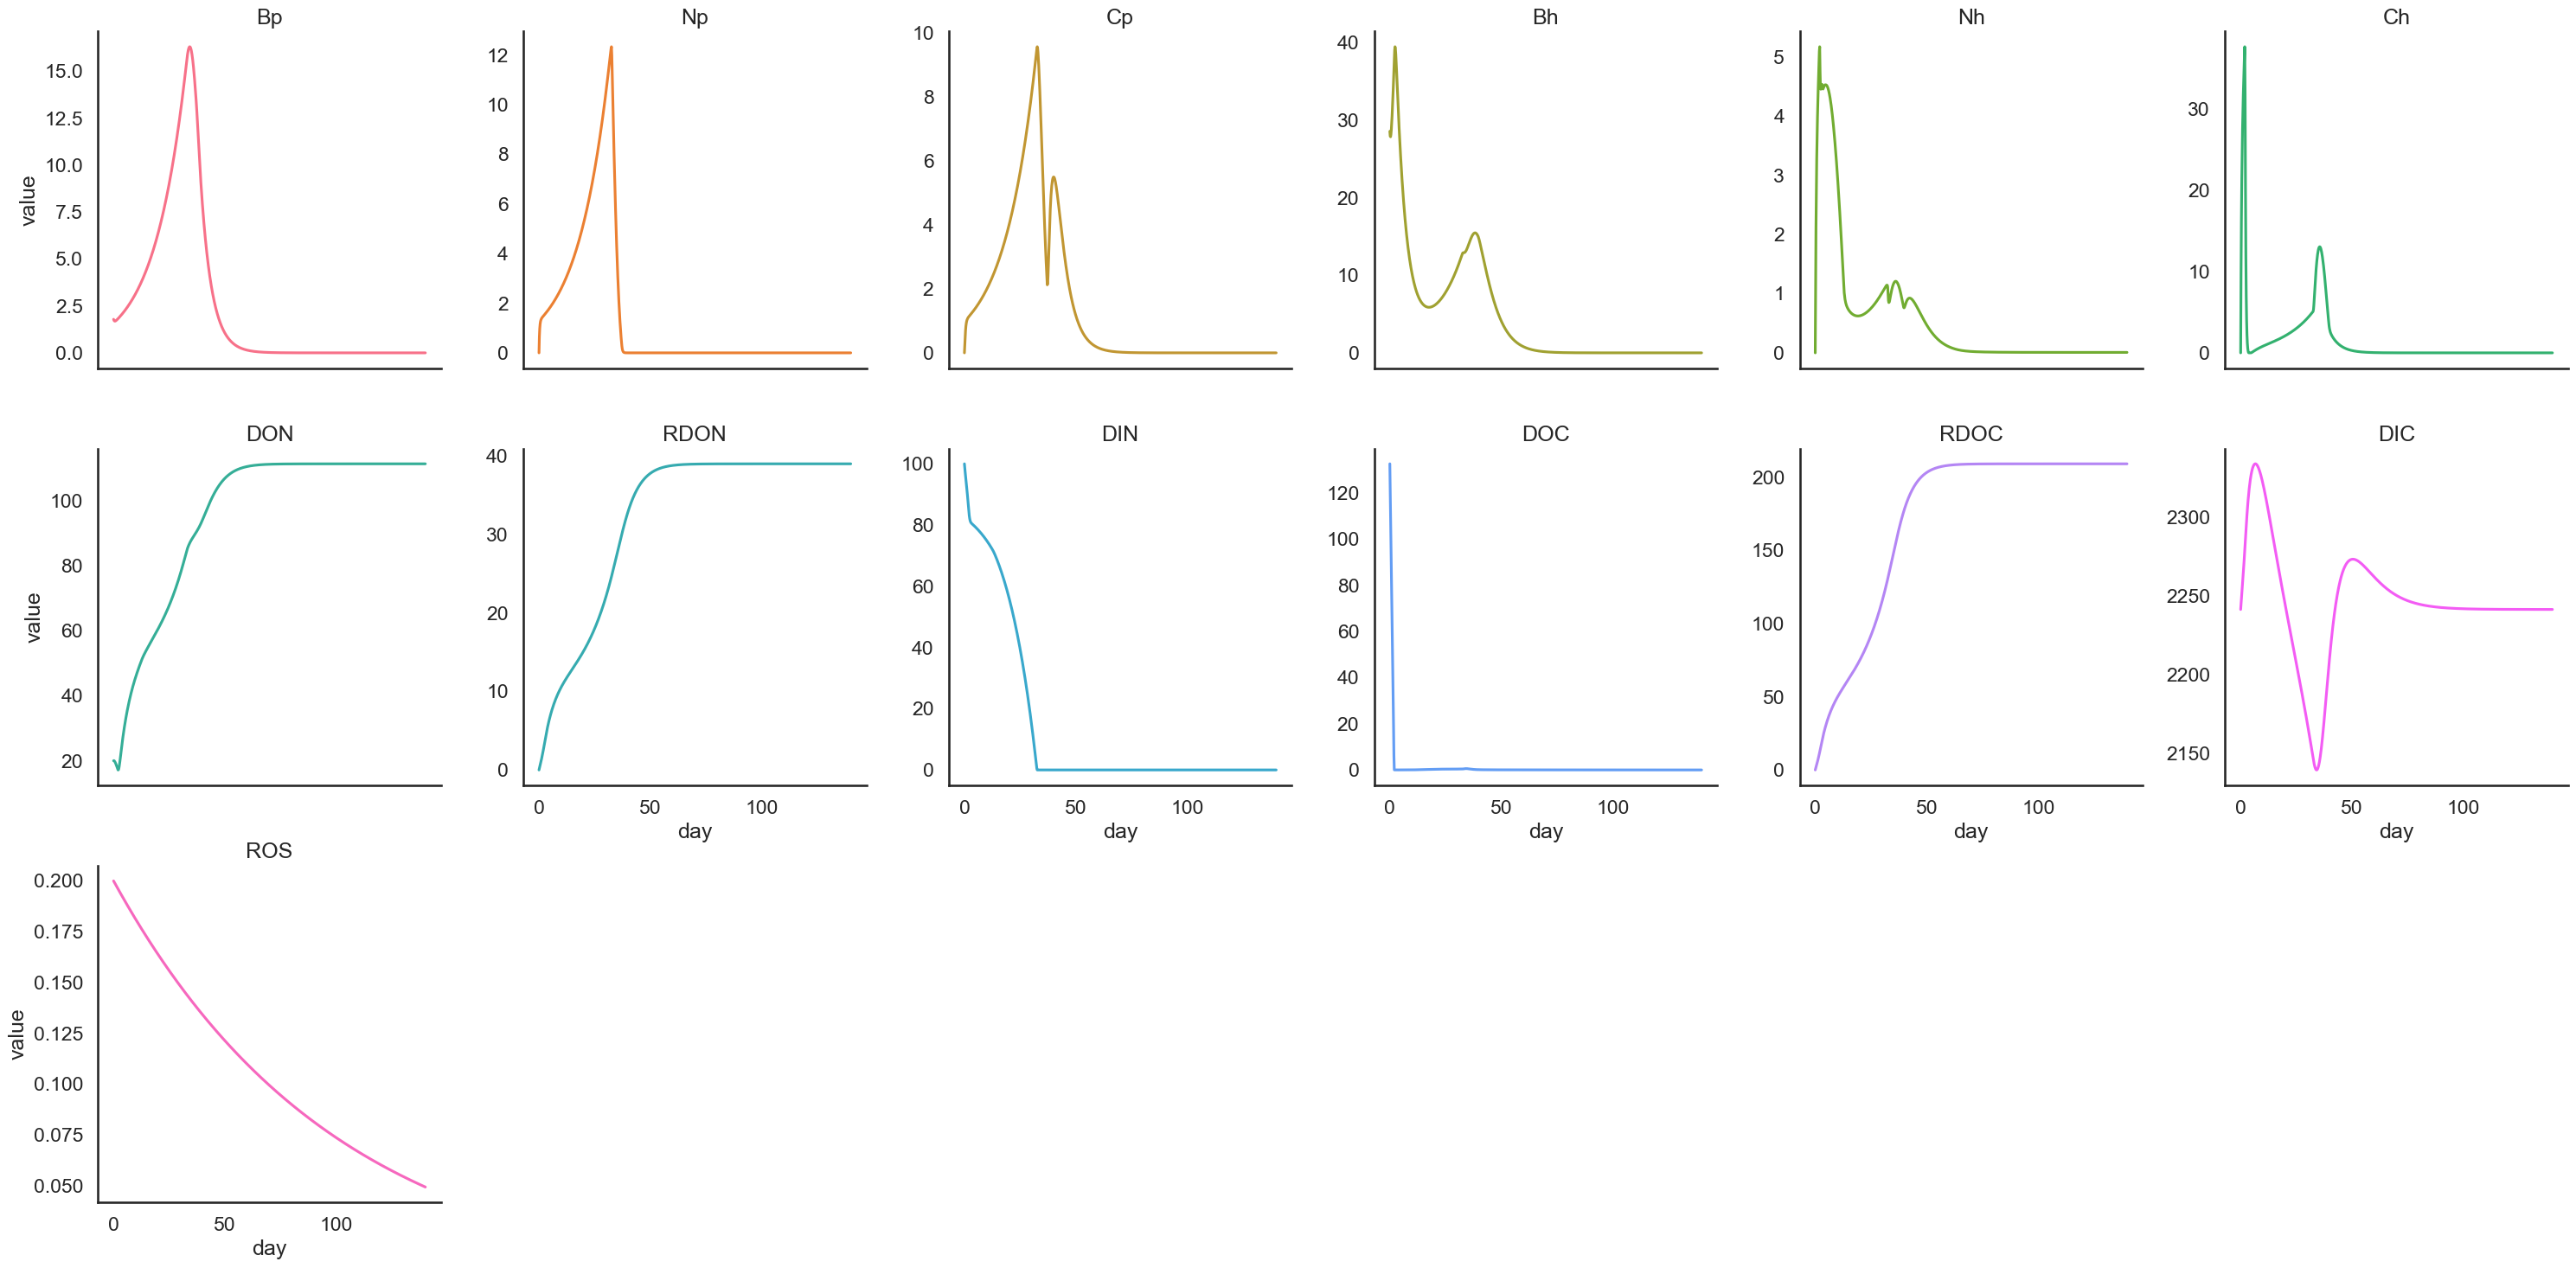

In [172]:
sns.set_context('talk')
sns.relplot(data=mdf, x='day', y='value', hue='variable',
            kind='line', 
            col='variable', col_wrap=6, facet_kws=dict(sharey=False),
            legend=False,
           ).set_titles(row_template = '{row_name}', col_template = '{col_name}')
plt.show()

In [140]:
#   %%timeit -r 1 -n 1

sol = run_solver(calc_dydt, init_vars, days=140, t_eval=get_t_eval(maxday=140, step = 3600*4, ref_times = refdf['t']))

simulation time 60.0625


In [141]:
sol

(array([       0.,    14400.,    28800.,    43200.,    57600.,    72000.,
           86400.,    93480.,   100800.,   115200.,   129600.,   144000.,
          158400.,   172800.,   187020.,   187200.,   201600.,   216000.,
          230400.,   237360.,   244800.,   259200.,   273600.,   288000.,
          302400.,   316800.,   324360.,   331200.,   345600.,   360000.,
          374400.,   388800.,   403200.,   406200.,   417600.,   432000.,
          446400.,   460800.,   475200.,   489600.,   494220.,   504000.,
          518400.,   532800.,   547200.,   561600.,   576000.,   581640.,
          590400.,   604800.,   619200.,   633600.,   648000.,   662400.,
          676800.,   689820.,   691200.,   705600.,   720000.,   734400.,
          748800.,   763200.,   772740.,   777600.,   792000.,   806400.,
          820800.,   835200.,   842040.,   849600.,   864000.,   878400.,
          892800.,   907200.,   921600.,   936000.,   936120.,   950400.,
          964800.,   979200.,   993600

In [142]:
df = solver2df(sol, var_names, interm_names, intermediate_func, param_vals)

In [143]:
df.columns

Index(['Bp', 'Np', 'Cp', 'Bh', 'Nh', 'Ch', 'DON', 'RDON', 'DIN', 'DOC', 'RDOC',
       'DIC', 'ROS', 'ABp', 'ABh', 't', 'day', 'gross_uptakeINp',
       'gross_uptakeONp', 'gross_uptakeINh', 'gross_uptakeONh',
       'gross_uptakeICp', 'gross_uptakeOCp', 'gross_uptakeICh',
       'gross_uptakeOCh', 'uptakeNp', 'uptakeNh', 'uptakeCp', 'uptakeCh',
       'regQCp', 'regQCh', 'regQNp', 'regQNh', 'bio_synthesisN_p',
       'bio_synthesisN_h', 'respirationCp', 'respirationCh',
       'biomass_breakdown_for_respirationCp',
       'biomass_breakdown_for_respirationCh', 'netDeltaNp', 'netDeltaNh',
       'netDeltaCp', 'netDeltaCh', 'store_keepNp', 'store_keepNh',
       'overflowNp', 'overflowNh', 'overflowCp', 'overflowCh',
       'dic_air_water_exchange', 'ABreleasep', 'ABreleaseh', 'death_ratep',
       'death_rateh', 'deathp', 'deathh', 'leakinessOp', 'leakinessIp',
       'leakinessOh', 'leakinessIh', 'ROSreleasep', 'ROSreleaseh',
       'ROSbreakdownh', 'DON2DINp', 'DON2DINh', 'Bp[C]', 'B

In [144]:
mdf = df.melt(id_vars=['t', 'day'])

In [145]:
mdf.variable.unique()

array(['Bp', 'Np', 'Cp', 'Bh', 'Nh', 'Ch', 'DON', 'RDON', 'DIN', 'DOC',
       'RDOC', 'DIC', 'ROS', 'ABp', 'ABh', 'gross_uptakeINp',
       'gross_uptakeONp', 'gross_uptakeINh', 'gross_uptakeONh',
       'gross_uptakeICp', 'gross_uptakeOCp', 'gross_uptakeICh',
       'gross_uptakeOCh', 'uptakeNp', 'uptakeNh', 'uptakeCp', 'uptakeCh',
       'regQCp', 'regQCh', 'regQNp', 'regQNh', 'bio_synthesisN_p',
       'bio_synthesisN_h', 'respirationCp', 'respirationCh',
       'biomass_breakdown_for_respirationCp',
       'biomass_breakdown_for_respirationCh', 'netDeltaNp', 'netDeltaNh',
       'netDeltaCp', 'netDeltaCh', 'store_keepNp', 'store_keepNh',
       'overflowNp', 'overflowNh', 'overflowCp', 'overflowCh',
       'dic_air_water_exchange', 'ABreleasep', 'ABreleaseh',
       'death_ratep', 'death_rateh', 'deathp', 'deathh', 'leakinessOp',
       'leakinessIp', 'leakinessOh', 'leakinessIh', 'ROSreleasep',
       'ROSreleaseh', 'ROSbreakdownh', 'DON2DINp', 'DON2DINh', 'Bp[C]',
       'Bh[C]'

In [146]:
mdf.nsmallest(10, 'value')

,t,day,variable,value
36493,172800.0,2.000000,netDeltaCh,-0.000836
36494,187020.0,2.164583,netDeltaCh,-0.000740
36495,187200.0,2.166667,netDeltaCh,-0.000736
36496,201600.0,2.333333,netDeltaCh,-0.000442
36497,216000.0,2.500000,netDeltaCh,-0.000266
36498,230400.0,2.666667,netDeltaCh,-0.000159
36499,237360.0,2.747222,netDeltaCh,-0.000124
42910,576000.0,6.666667,dic_air_water_exchange,-0.000113
42909,561600.0,6.500000,dic_air_water_exchange,-0.000113
42911,581640.0,6.731944,dic_air_water_exchange,-0.000113


In [147]:
df.head()

,Bp,Np,Cp,Bh,Nh,Ch,DON,RDON,DIN,DOC,...,leakinessIh,ROSreleasep,ROSreleaseh,ROSbreakdownh,DON2DINp,DON2DINh,Bp[C],Bh[C],ABp[C],ABh[C]
0,1.785714,0.000000,0.000000,28.571429,0.000000,0.000000,20.000000,0.000000,100.000000,132.500000,...,0.0,0.0,0.0,0.0,0.000004,0.000066,12.500000,128.571429,0.0,0.0
1,1.734858,0.650016,0.240120,27.949693,1.211440,9.627725,19.062085,0.199777,99.549273,121.329723,...,0.0,0.0,0.0,0.0,0.000004,0.000062,12.144006,125.773617,0.0,0.0
2,1.704601,0.981799,0.501170,27.872156,2.121107,16.395596,18.059795,0.397048,99.220636,110.594181,...,0.0,0.0,0.0,0.0,0.000004,0.000058,11.932204,125.424704,0.0,0.0
3,1.691595,1.159270,0.697294,28.184777,2.788881,21.233768,17.031949,0.595036,98.905635,99.989676,...,0.0,0.0,0.0,0.0,0.000003,0.000056,11.841165,126.831497,0.0,0.0
4,1.690644,1.259630,0.832465,28.772716,3.285058,24.804907,15.996170,0.796036,98.556890,89.323361,...,0.0,0.0,0.0,0.0,0.000003,0.000053,11.834507,129.477220,0.0,0.0


In [148]:
df.min().head(30)

Bp                 1.358741e+00
Np                 0.000000e+00
Cp                 0.000000e+00
Bh                 1.829349e+00
Nh                 0.000000e+00
Ch                -4.252169e-22
DON                4.451230e+00
RDON               0.000000e+00
DIN                5.360802e-03
DOC                7.191370e-02
RDOC               0.000000e+00
DIC                1.970783e+03
ROS                4.940166e-02
ABp                0.000000e+00
ABh                0.000000e+00
t                  0.000000e+00
day                0.000000e+00
gross_uptakeINp    2.436402e-06
gross_uptakeONp    0.000000e+00
gross_uptakeINh    0.000000e+00
gross_uptakeONh    0.000000e+00
gross_uptakeICp    3.428353e-05
gross_uptakeOCp    0.000000e+00
gross_uptakeICh    0.000000e+00
gross_uptakeOCh    3.285789e-05
uptakeNp           2.436402e-06
uptakeNh           0.000000e+00
uptakeCp           3.428353e-05
uptakeCh           3.285789e-05
regQCp             3.000000e-01
dtype: float64

In [149]:
df.describe().T.head(30)

,count,mean,std,min,25%,50%,75%,max
Bp,912.0,1.101293e+01,9.922405e+00,1.358741e+00,3.239346e+00,7.262780e+00,1.616955e+01,3.908711e+01
Np,912.0,5.311452e+00,5.978502e+00,0.000000e+00,1.425408e+00,3.136827e+00,6.296083e+00,2.827365e+01
Cp,912.0,5.109171e+00,4.959855e+00,0.000000e+00,1.475994e+00,3.281548e+00,7.465194e+00,2.197124e+01
Bh,912.0,1.423945e+01,1.066231e+01,1.829349e+00,5.934015e+00,1.060497e+01,2.106326e+01,3.946786e+01
Nh,912.0,1.186221e+00,1.126298e+00,0.000000e+00,3.547592e-01,7.815418e-01,1.573445e+00,5.156649e+00
Ch,912.0,5.457498e+00,7.011085e+00,-4.252169e-22,1.335653e+00,3.072629e+00,6.672963e+00,3.777168e+01
DON,912.0,8.551844e+00,2.678602e+00,4.451230e+00,7.017027e+00,7.025698e+00,9.958310e+00,2.000000e+01
RDON,912.0,8.211878e+01,4.995401e+01,0.000000e+00,2.533633e+01,9.913735e+01,1.301138e+02,1.396154e+02
DIN,912.0,2.793647e+01,4.276973e+01,5.360802e-03,1.167780e-02,1.170640e-02,7.136037e+01,1.082309e+02
DOC,912.0,1.277563e+00,9.491089e+00,7.191370e-02,2.384132e-01,2.390500e-01,3.194195e-01,1.325000e+02


In [150]:
sns.set_context('talk')
sns.relplot(data=mdf.loc[~mdf.value.isin([np.Inf, -np.Inf, ])], x='t', y='value', hue='variable',
            kind='line', 
            col='variable', col_wrap=6, facet_kws=dict(sharey=False),
            legend=False,
           ).set_titles(row_template = '{row_name}', col_template = '{col_name}')

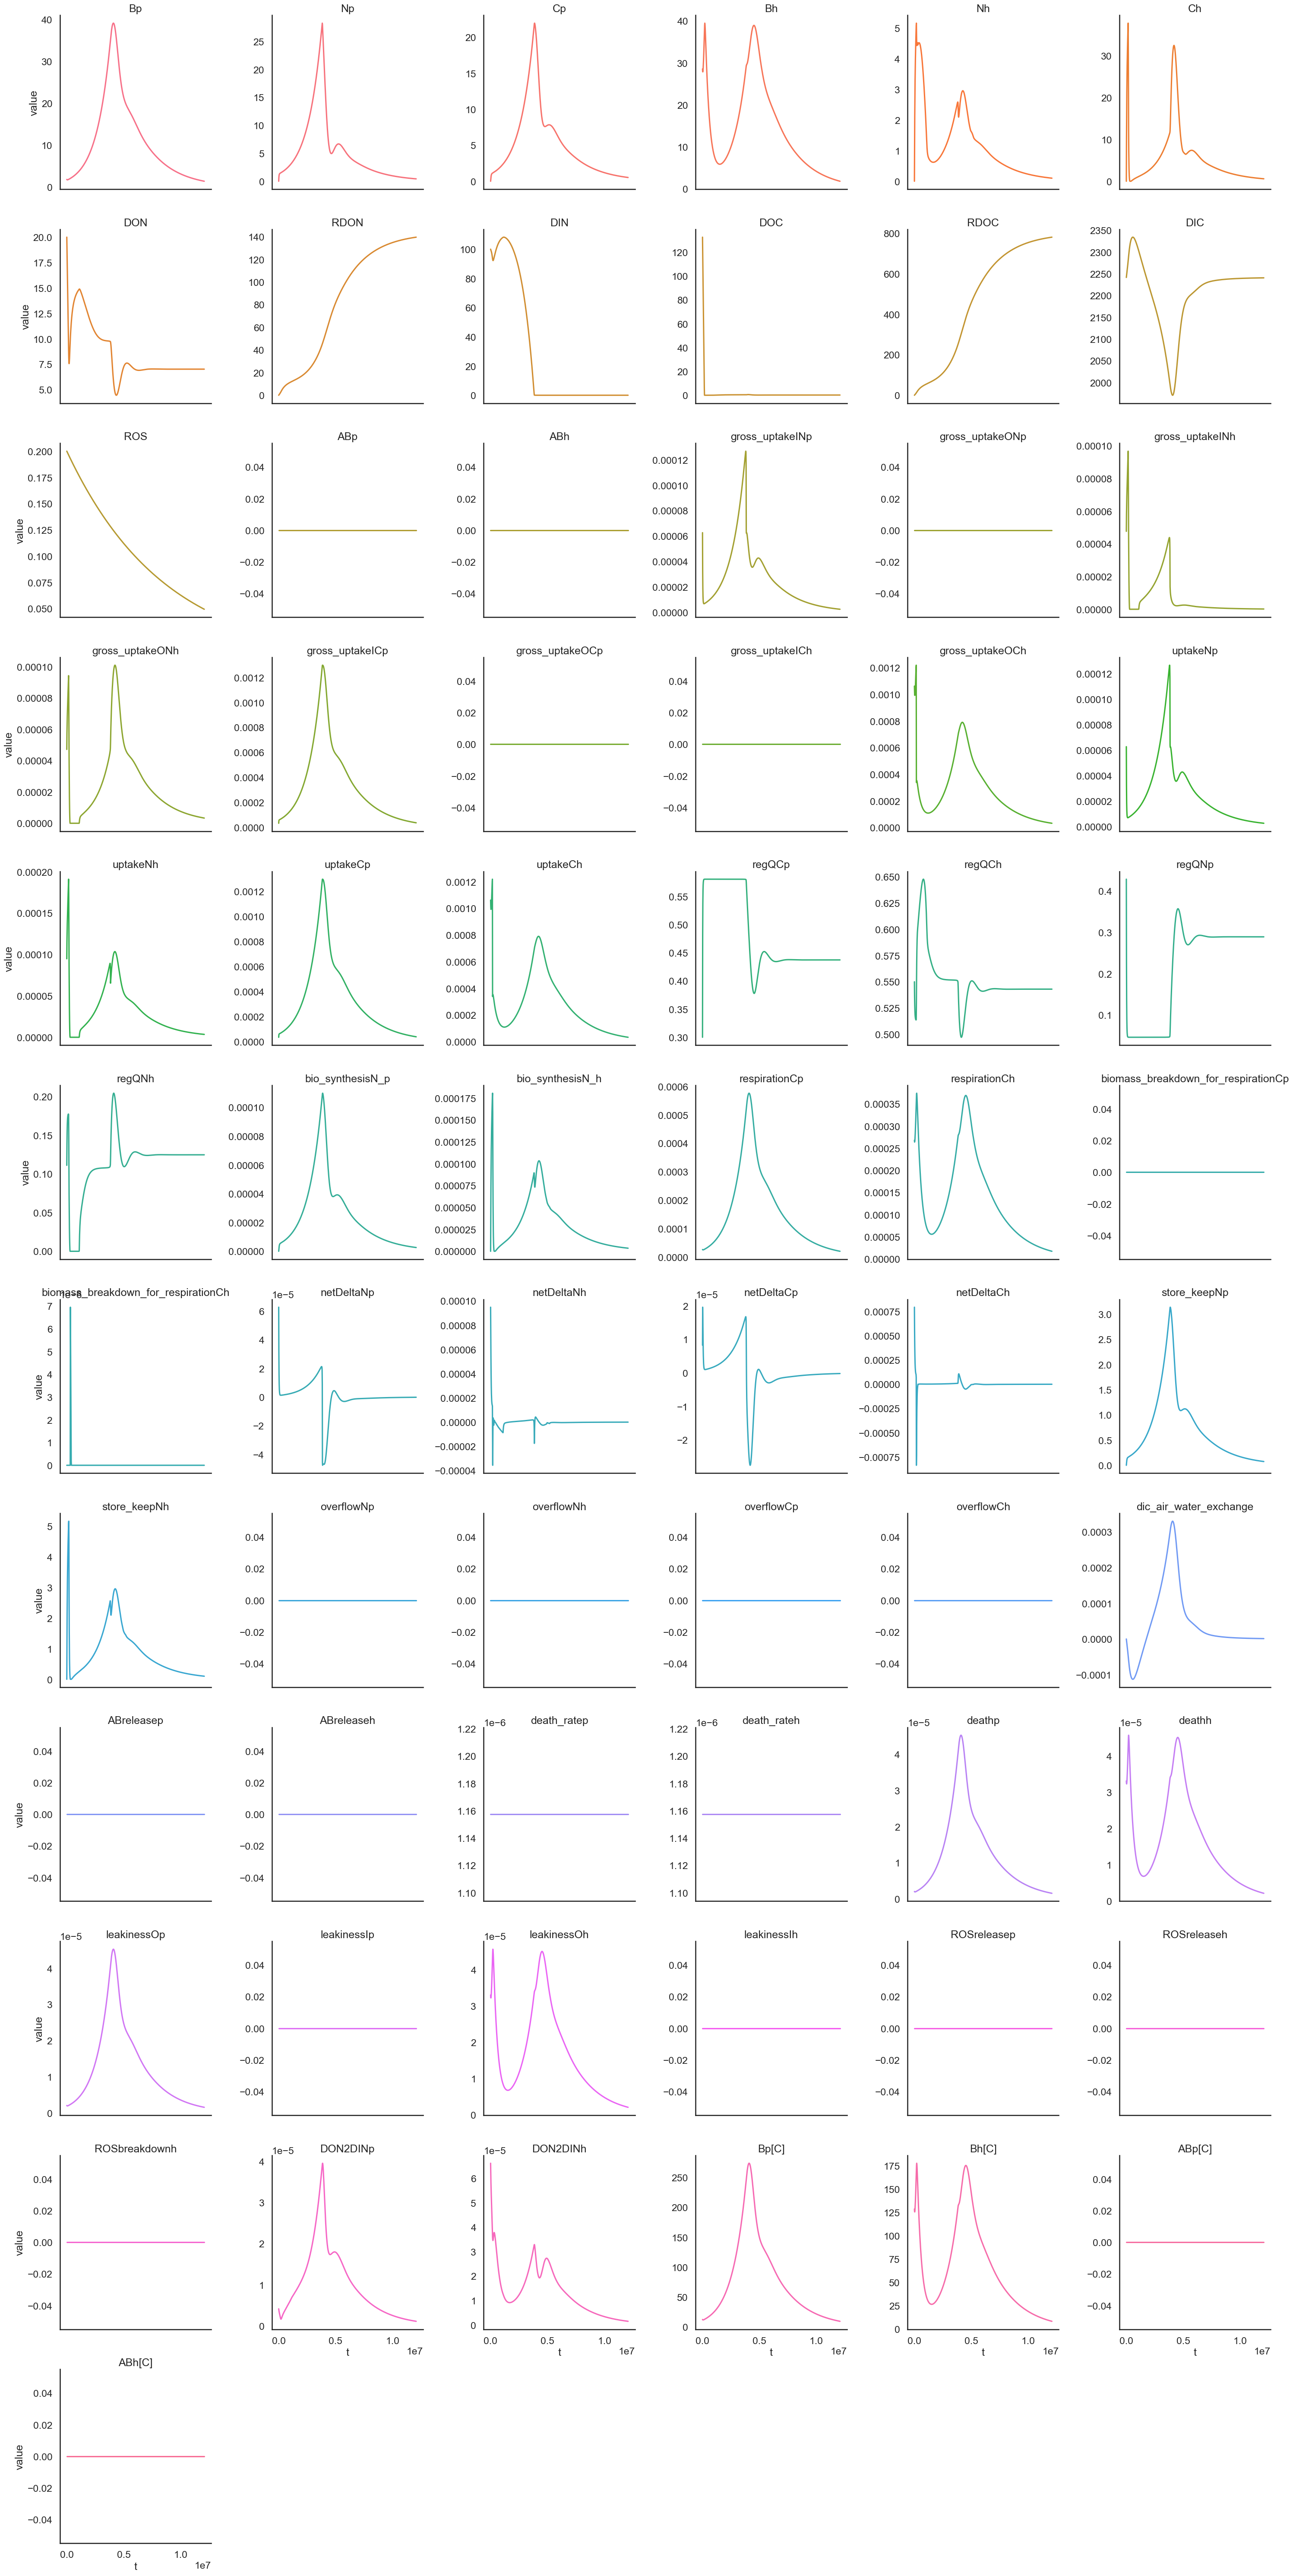

In [151]:
plt.show()

In [152]:
df.columns

Index(['Bp', 'Np', 'Cp', 'Bh', 'Nh', 'Ch', 'DON', 'RDON', 'DIN', 'DOC', 'RDOC',
       'DIC', 'ROS', 'ABp', 'ABh', 't', 'day', 'gross_uptakeINp',
       'gross_uptakeONp', 'gross_uptakeINh', 'gross_uptakeONh',
       'gross_uptakeICp', 'gross_uptakeOCp', 'gross_uptakeICh',
       'gross_uptakeOCh', 'uptakeNp', 'uptakeNh', 'uptakeCp', 'uptakeCh',
       'regQCp', 'regQCh', 'regQNp', 'regQNh', 'bio_synthesisN_p',
       'bio_synthesisN_h', 'respirationCp', 'respirationCh',
       'biomass_breakdown_for_respirationCp',
       'biomass_breakdown_for_respirationCh', 'netDeltaNp', 'netDeltaNh',
       'netDeltaCp', 'netDeltaCh', 'store_keepNp', 'store_keepNh',
       'overflowNp', 'overflowNh', 'overflowCp', 'overflowCh',
       'dic_air_water_exchange', 'ABreleasep', 'ABreleaseh', 'death_ratep',
       'death_rateh', 'deathp', 'deathh', 'leakinessOp', 'leakinessIp',
       'leakinessOh', 'leakinessIh', 'ROSreleasep', 'ROSreleaseh',
       'ROSbreakdownh', 'DON2DINp', 'DON2DINh', 'Bp[C]', 'B

In [153]:
df.loc[df.t.isin([11, 12])][['t','Bp', 'Np', 'Cp', 'Bh', 'Nh', 'Ch', 'DON', 'RDON', 'DIN', 'DOC', 'RDOC',
       'DIC',  'netDeltaNp', 'netDeltaNh',
       'netDeltaCp', 'netDeltaCh', 'store_keepNp', 'store_keepNh',
       'overflowNp', 'overflowNh', 'overflowCp', 'overflowCh', 'biomass_breakdown_for_respirationCh'
]].T


""
t
Bp
Np
Cp
Bh
Nh
Ch
DON
RDON
DIN


In [154]:
refdf.columns

Index(['day', 'Sample', 'id', 'replicate', 'transfer', 'transfer day',
       'heterotroph', 'full name', 'FL', 'Group', 'predicted', 'ref_Bp', 'LOD',
       't'],
      dtype='object')

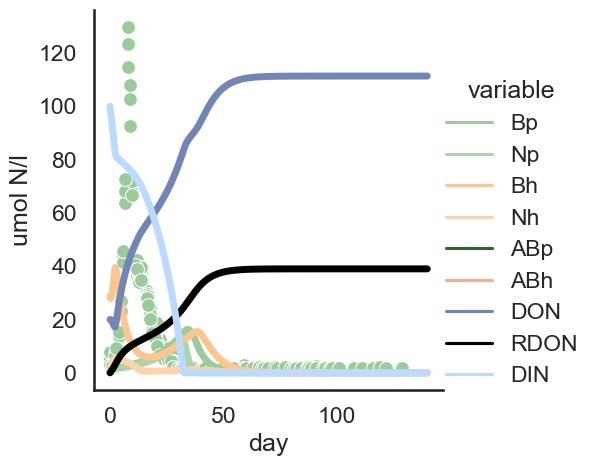

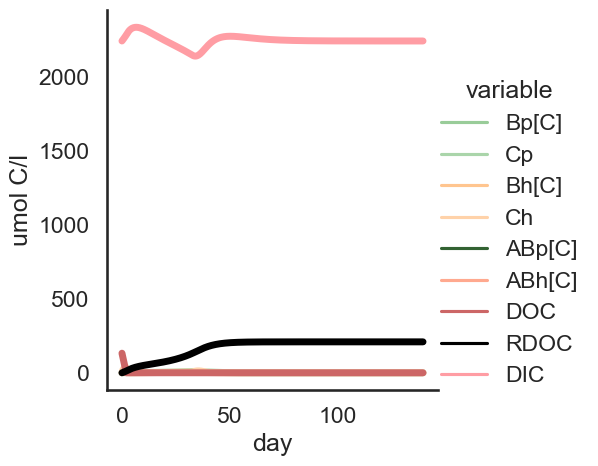

In [173]:
g = sns.relplot(data=mdf.loc[mdf.variable.isin(ccnorder)], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, #legend=False,
            palette=ccnpalette, hue_order=ccnorder,
           ).set(ylabel='umol N/l', )
sns.scatterplot(data=refdf, x='day', y='ref_Bp', ax=g.ax, s=100, legend=False, color=PCOLOR)
#sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=g.ax, s=100, legend=False, color=HCOLOR)

g = sns.relplot(data=mdf.loc[mdf.variable.isin(cccorder)], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, #legend=False,
            palette=cccpalette, hue_order=cccorder,
           ).set(ylabel='umol C/l', )
#sns.scatterplot(data=refdf, x='day', y='cc Bp[C]', ax=g.ax, s=100, legend=False, color=PCOLOR)
#sns.scatterplot(data=refdf, x='day', y='cc Bh[C]', ax=g.ax, s=100, legend=False, color=HCOLOR)

# g = sns.relplot(data=mdf.loc[mdf.variable.isin(['Xp', 'Xh'])], 
#             x='day', y='value', hue='variable',
#             kind='line', 
#             lw=5, legend=False,
#             palette=ccxpalette, hue_order=ccxorder,
#            ).set(ylabel='cells/l')
#sns.scatterplot(data=refdf, x='day', y='cc mit9312', ax=g.ax, s=100, legend=False, color=PCOLOR)
#sns.scatterplot(data=refdf, x='day', y='cc 1A3', ax=g.ax, s=100, legend=False, color=HCOLOR)
plt.show()

In [156]:
df.Bh.value_counts()

28.571429    1
10.234618    1
10.117875    1
10.060045    1
10.002572    1
            ..
29.633122    1
29.703549    1
29.789616    1
29.898123    1
1.829349     1
Name: Bh, Length: 912, dtype: int64

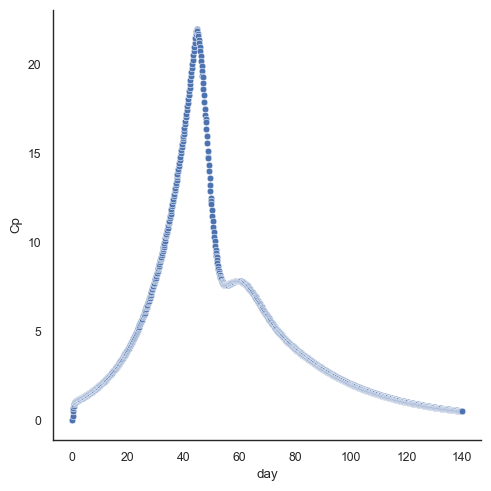

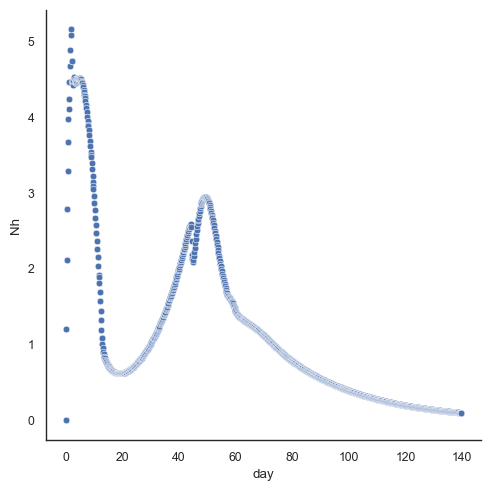

In [157]:
sns.set_context('paper')
sns.relplot(data=df, x='day', y='Cp')
sns.relplot(data=df, x='day', y='Nh')
#plt.ylim((0,0.0002))
#plt.yscale('log')
plt.show()

In [158]:
df.columns

Index(['Bp', 'Np', 'Cp', 'Bh', 'Nh', 'Ch', 'DON', 'RDON', 'DIN', 'DOC', 'RDOC',
       'DIC', 'ROS', 'ABp', 'ABh', 't', 'day', 'gross_uptakeINp',
       'gross_uptakeONp', 'gross_uptakeINh', 'gross_uptakeONh',
       'gross_uptakeICp', 'gross_uptakeOCp', 'gross_uptakeICh',
       'gross_uptakeOCh', 'uptakeNp', 'uptakeNh', 'uptakeCp', 'uptakeCh',
       'regQCp', 'regQCh', 'regQNp', 'regQNh', 'bio_synthesisN_p',
       'bio_synthesisN_h', 'respirationCp', 'respirationCh',
       'biomass_breakdown_for_respirationCp',
       'biomass_breakdown_for_respirationCh', 'netDeltaNp', 'netDeltaNh',
       'netDeltaCp', 'netDeltaCh', 'store_keepNp', 'store_keepNh',
       'overflowNp', 'overflowNh', 'overflowCp', 'overflowCh',
       'dic_air_water_exchange', 'ABreleasep', 'ABreleaseh', 'death_ratep',
       'death_rateh', 'deathp', 'deathh', 'leakinessOp', 'leakinessIp',
       'leakinessOh', 'leakinessIh', 'ROSreleasep', 'ROSreleaseh',
       'ROSbreakdownh', 'DON2DINp', 'DON2DINh', 'Bp[C]', 'B

In [159]:
df.clip(lower=0)

,Bp,Np,Cp,Bh,Nh,Ch,DON,RDON,DIN,DOC,...,leakinessIh,ROSreleasep,ROSreleaseh,ROSbreakdownh,DON2DINp,DON2DINh,Bp[C],Bh[C],ABp[C],ABh[C]
0,1.785714,0.000000,0.000000,28.571429,0.000000,0.000000,20.000000,0.000000,100.000000,132.500000,...,0.0,0.0,0.0,0.0,0.000004,0.000066,12.500000,128.571429,0.0,0.0
1,1.734858,0.650016,0.240120,27.949693,1.211440,9.627725,19.062085,0.199777,99.549273,121.329723,...,0.0,0.0,0.0,0.0,0.000004,0.000062,12.144006,125.773617,0.0,0.0
2,1.704601,0.981799,0.501170,27.872156,2.121107,16.395596,18.059795,0.397048,99.220636,110.594181,...,0.0,0.0,0.0,0.0,0.000004,0.000058,11.932204,125.424704,0.0,0.0
3,1.691595,1.159270,0.697294,28.184777,2.788881,21.233768,17.031949,0.595036,98.905635,99.989676,...,0.0,0.0,0.0,0.0,0.000003,0.000056,11.841165,126.831497,0.0,0.0
4,1.690644,1.259630,0.832465,28.772716,3.285058,24.804907,15.996170,0.796036,98.556890,89.323361,...,0.0,0.0,0.0,0.0,0.000003,0.000053,11.834507,129.477220,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,1.390216,0.433961,0.533036,1.871726,0.102526,0.599385,7.017639,139.529395,0.011680,0.239050,...,0.0,0.0,0.0,0.0,0.000001,0.000002,9.731513,8.422765,0.0,0.0
908,1.382280,0.431484,0.529993,1.861040,0.101941,0.595963,7.017639,139.551079,0.011680,0.239050,...,0.0,0.0,0.0,0.0,0.000001,0.000002,9.675958,8.374681,0.0,0.0
909,1.374389,0.429021,0.526967,1.850416,0.101359,0.592561,7.017639,139.572640,0.011680,0.239050,...,0.0,0.0,0.0,0.0,0.000001,0.000002,9.620720,8.326872,0.0,0.0
910,1.366543,0.426571,0.523959,1.839852,0.100780,0.589178,7.017639,139.594077,0.011680,0.239050,...,0.0,0.0,0.0,0.0,0.000001,0.000001,9.565798,8.279336,0.0,0.0


In [174]:
from matplotlib.colors import LinearSegmentedColormap
df.clip(lower=0)[ccnorder+ ['day']].plot.area(x='day', 
                                colormap=LinearSegmentedColormap.from_list("", ccnpalette) 
                               )
plt.legend(bbox_to_anchor =(1,1))
plt.show()
df.clip(lower=0)[cccorder+ ['day']].plot.area(x='day', 
                                colormap=LinearSegmentedColormap.from_list("", cccpalette) 
                               )
plt.legend(bbox_to_anchor =(1,1))
plt.show()


KeyError: "['ABp', 'ABh'] not in index"